In [5]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt

from signal_aspect_detection.find_polygones import *

def create_binary2(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
    threshi = cv2.bitwise_not(thresh)
    return threshi

def handle_image(I):
    #detect polygones
    print(I.shape)
    binary_img = create_binary2(I)
    polygones = detect_polygones(binary_img)
    print(len(polygones)," polygones detected")
    for p in polygones:
        print(p.rectangle)

    I2 = np.copy(I)
    paint_polygones(I2,polygones)
    return binary_img, I2
    


In [6]:
def color_stat(img):
    
    counter = dict()
      
    rows , columns, channels= img.shape
    pixels = rows * columns
    print("shape",rows , columns, channels , "pixels",pixels)
    
    
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    for r in range(rows):   #for each column
        for c in range(columns):   
            
            L , a , b = lab[r,c]
            
            key = "{}/{}/{}".format(round(L),round(a),round(b))
            #key = "{}".format(round(L))
            if not key in counter:
                counter[key] = 0
            counter[key] += 1
            
    #sort
    keys = set()
    cnt = 0
    counter = {k: v for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True)}
    for k , v in counter.items():
        if cnt / pixels > 0.8: break
        cnt += v
        keys.add(k)
        #print(k,v)
        
    threshold = 0
    for r in range(rows):   #for each column
        for c in range(columns):   
            L , a , b = lab[r,c]
            #key = "{}".format(round(L))
            key = "{}/{}/{}".format(round(L),round(a),round(b))
            if key in keys:
                g = gray[r,c]
                if g > threshold:
                    threshold = g;
        
    print("threshold",threshold)
        
    nimg = np.copy(img)
    for r in range(rows):   #for each column
        for c in range(columns):   
            L , a , b = lab[r,c]
            #key = "{}".format(round(L))
            key = "{}/{}/{}".format(round(L),round(a),round(b))
            if key in keys:
                #nimg[r,c] = [ 0, 0, 0 ] #black
                pass #original, dont change
            else:
                nimg[r,c] = [ 255, 255, 255 ] #white

    
    return nimg

In [7]:



def contrast(img):

    #-----Converting image to LAB Color model----------------------------------- 
    #lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    #-----Splitting the LAB image to different channels-------------------------
    #l, a, b = cv2.split(lab)
    
  
    #L,a,b,c = get_lab(img)
    
    #plt.scatter(a, b,c = c)
    
    #plt.xlim(-150, 150)
    #plt.ylim(-150, 150)
    #plt.show()
    
    #plt.imshow(l)
    #plt.show()
    #plt.imshow(a)
    #plt.show()
    #plt.imshow(b)
    #plt.show()

    #black white 
    #(thresh, blackAndWhiteImage) = cv2.threshold(l, 10, 255, cv2.THRESH_BINARY)
    #plt.imshow(blackAndWhiteImage)
    #plt.show()
    
    #-----Applying CLAHE to L-channel-------------------------------------------
    #clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    #cl = clahe.apply(l)
    #cv2.imshow('CLAHE output', cl)

    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    #limg = cv2.merge((l,a,b))
    #cv2.imshow('limg', limg)
    #plt.imshow(limg)
    #plt.show()

    #-----Converting image from LAB Color model to RGB model--------------------
    #final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    #return final 

SyntaxError: unexpected EOF while parsing (<ipython-input-7-497e1f4c14f5>, line 42)

In [9]:
def th(img):

    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th1, th2, th3]
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    
def th2(img):
    # global thresholding
    ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # plot all the images and their histograms
    images = [img, 0, th1,
              img, 0, th2,
              blur, 0, th3]
    titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
              'Original Noisy Image','Histogram',"Otsu's Thresholding",
              'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
    for i in range(3):
        plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
        plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
        plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
        plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()

01_original.png


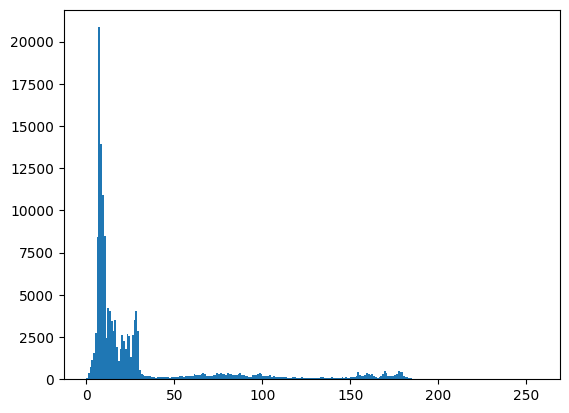

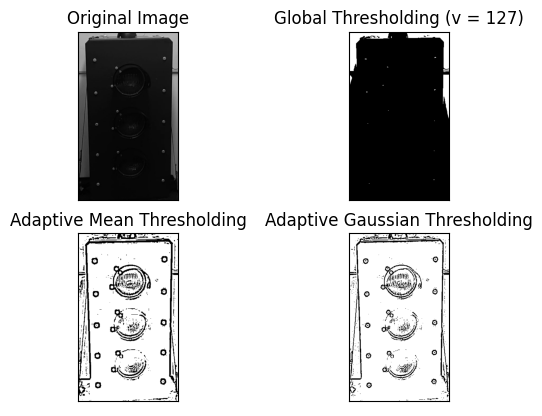

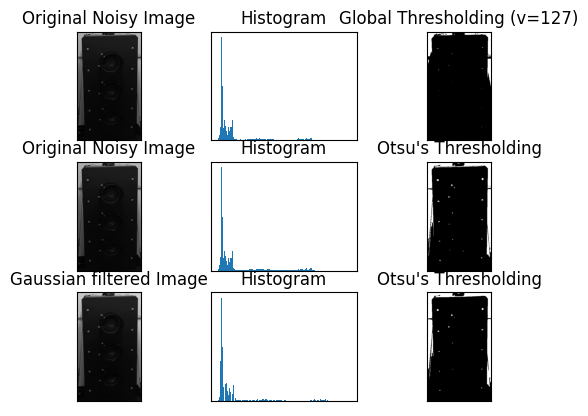

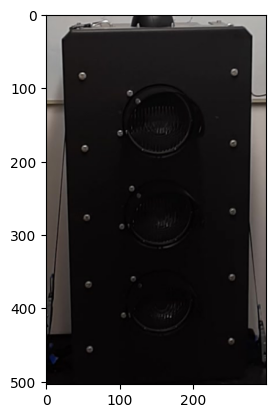

115_original.png


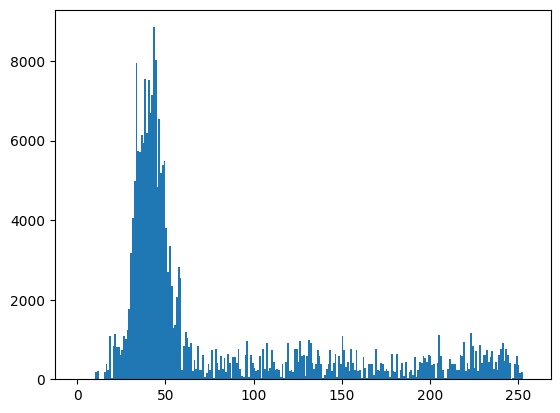

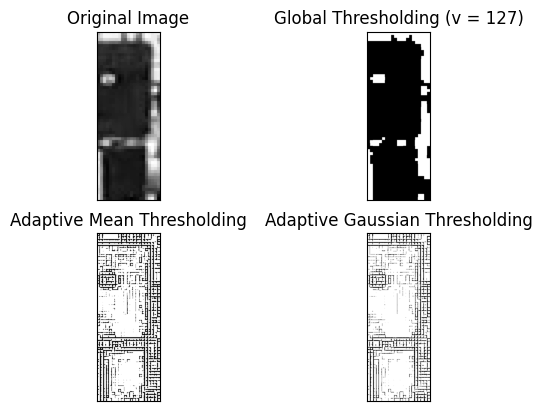

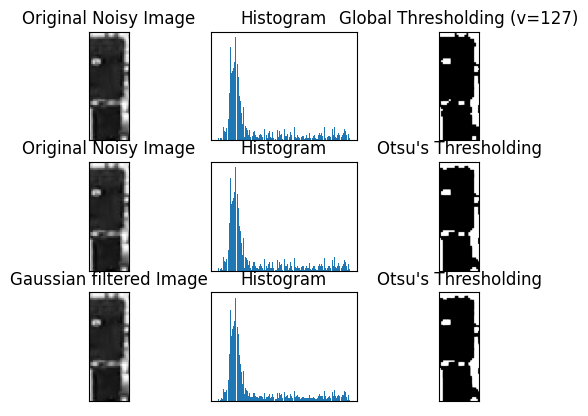

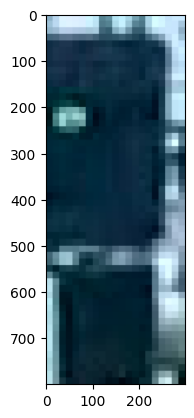

256_original.png


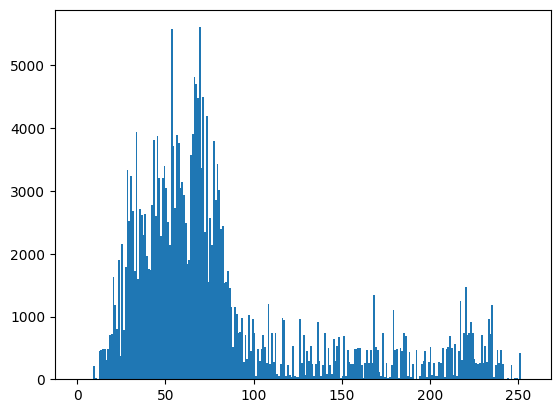

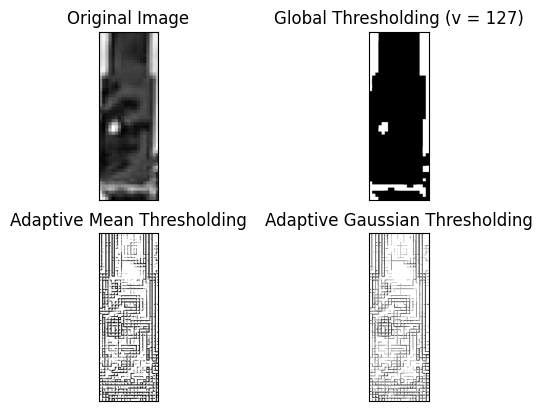

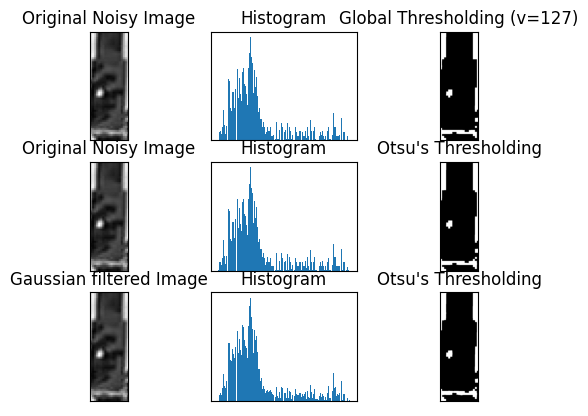

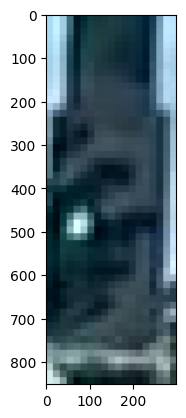

35_original.png


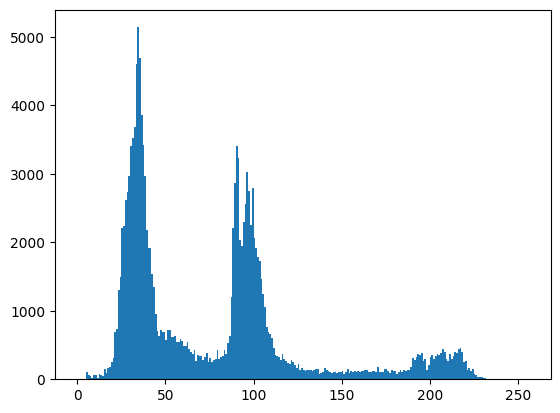

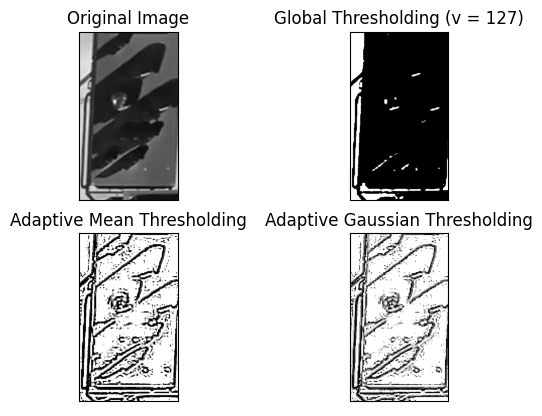

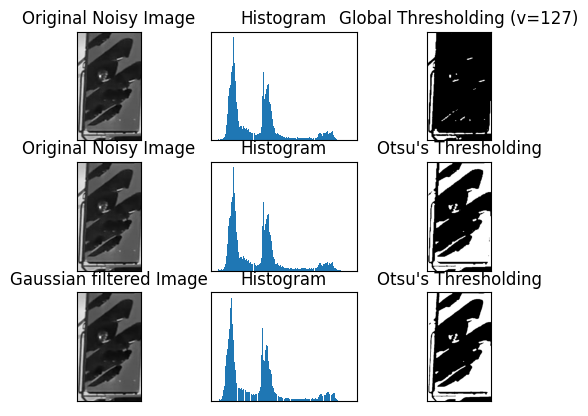

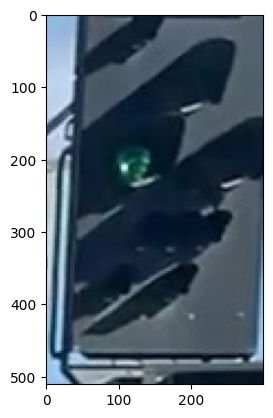

44_original.png


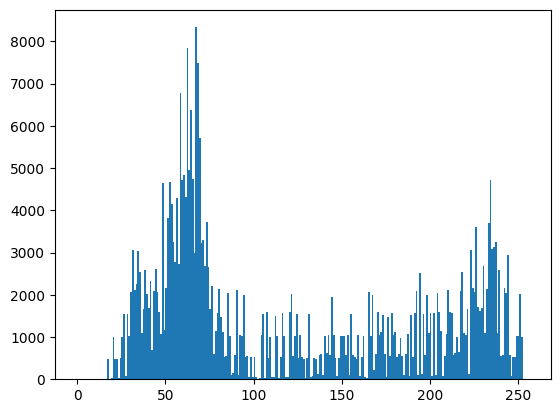

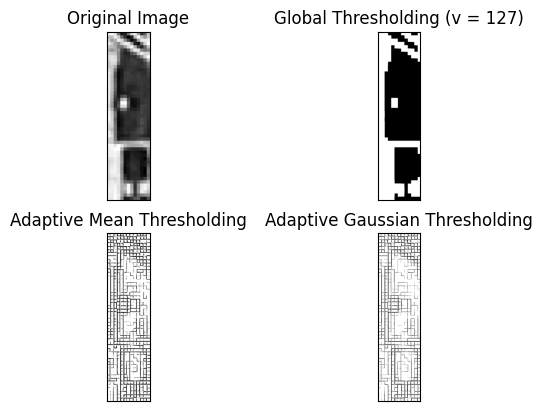

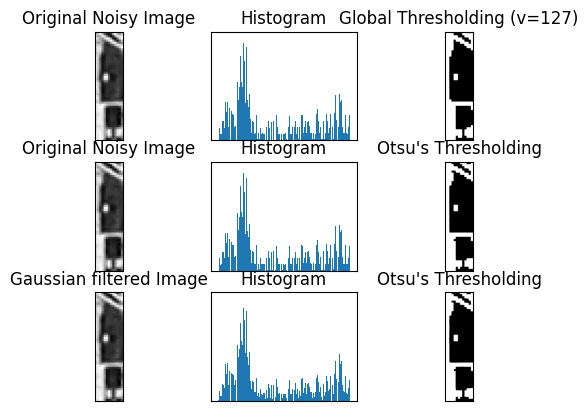

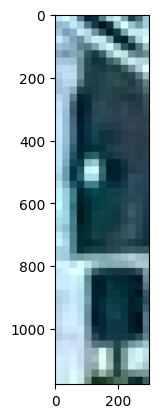

kshauptsignal2_Ks2_vBw.png


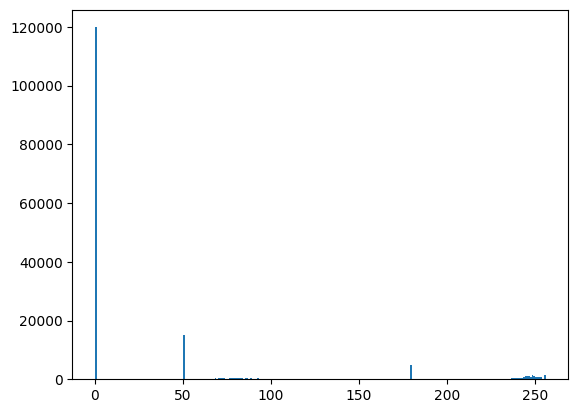

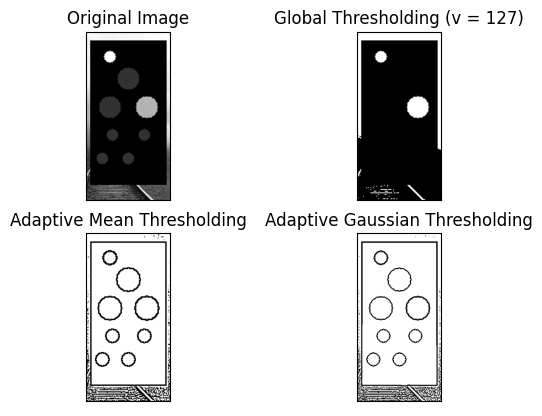

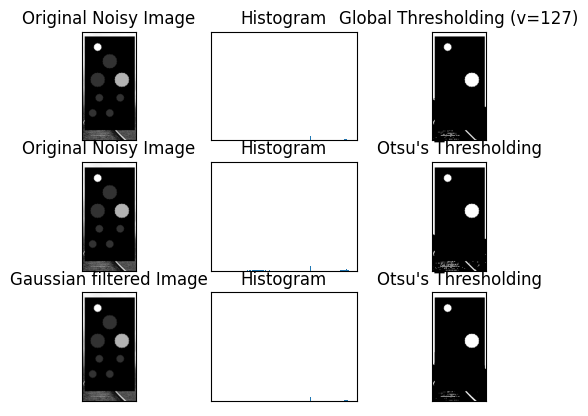

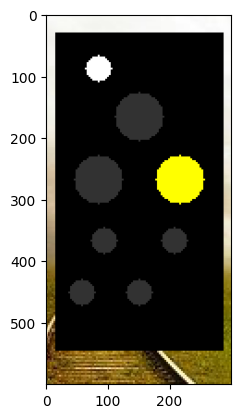

scheibenberg.png


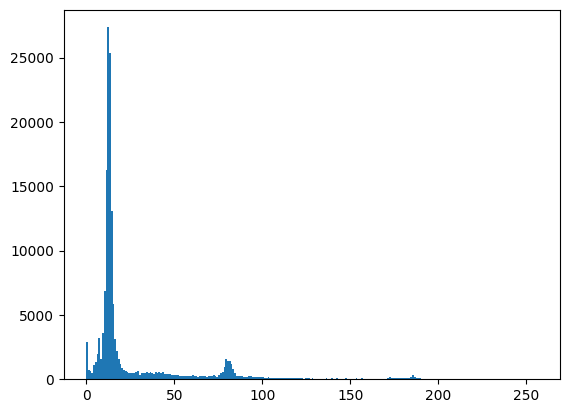

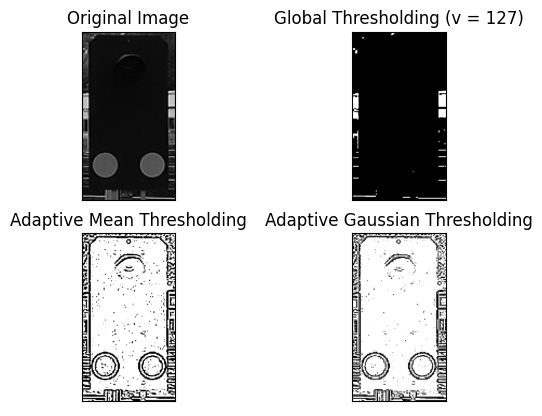

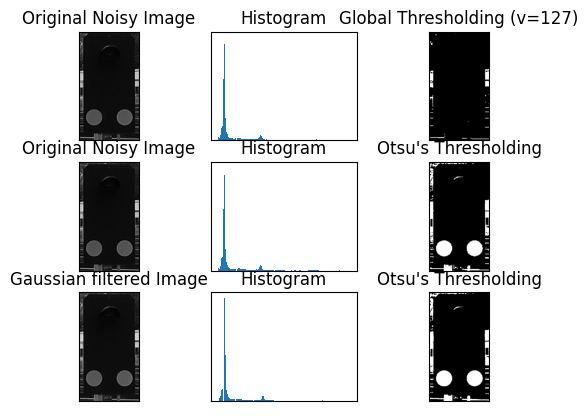

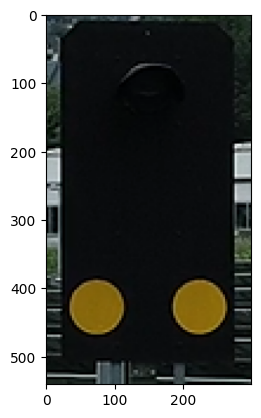

traffic_light0005.png


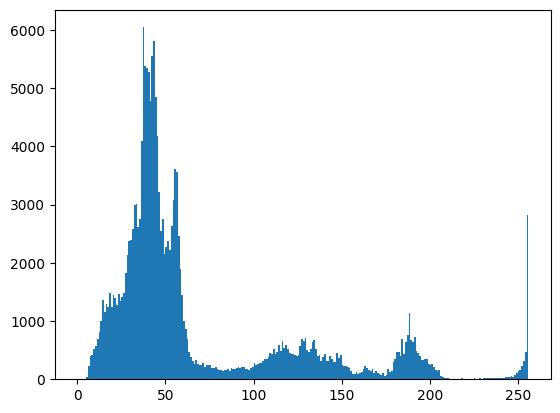

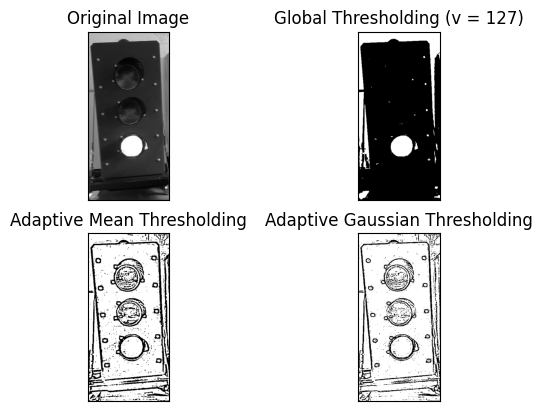

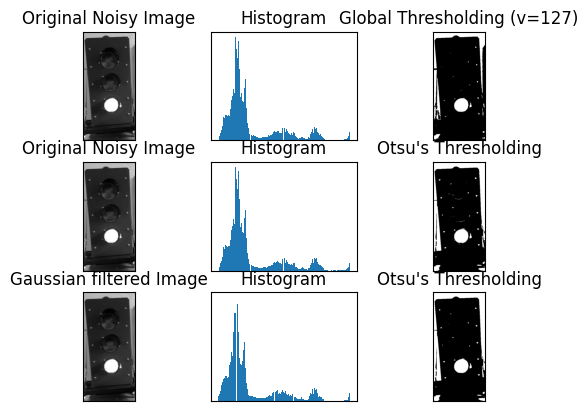

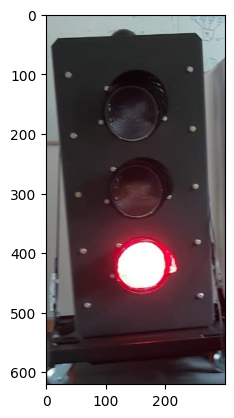

traffic_light0006.png


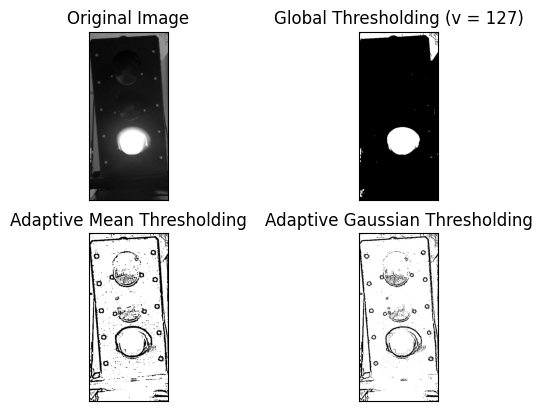

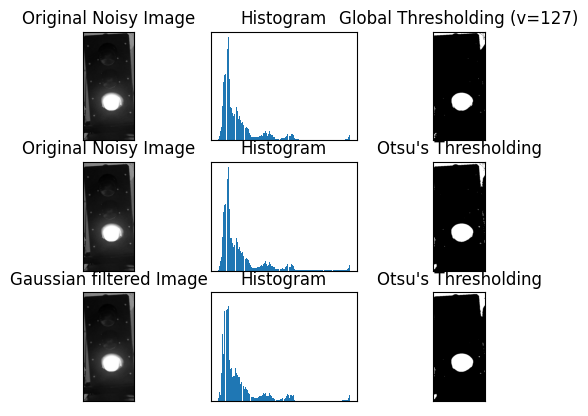

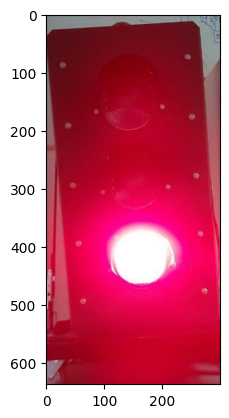

traffic_light0011.png


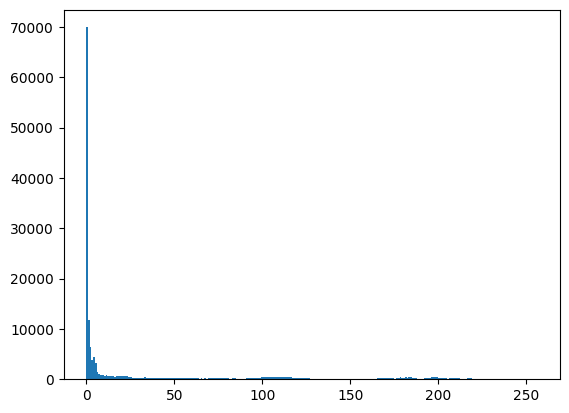

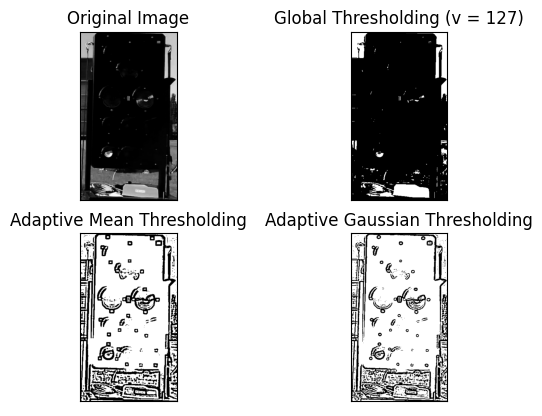

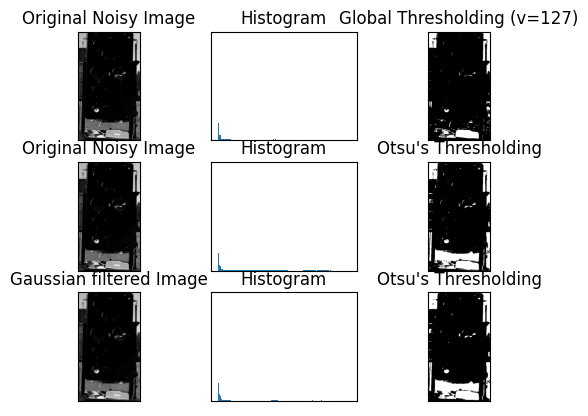

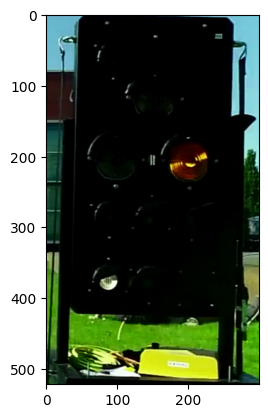

traffic_light0032.png


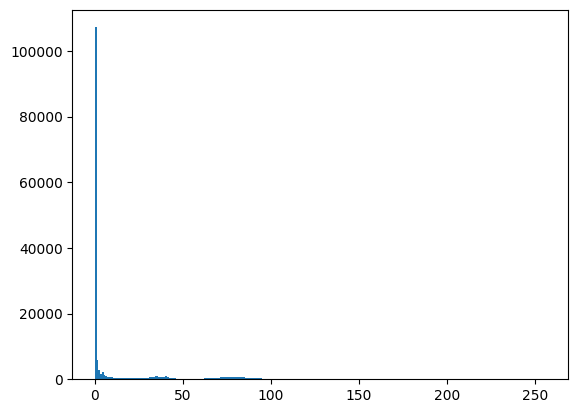

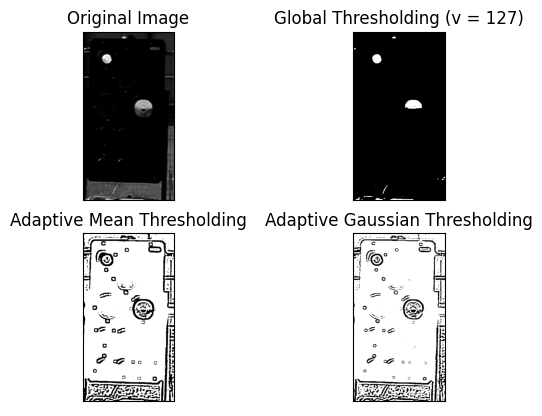

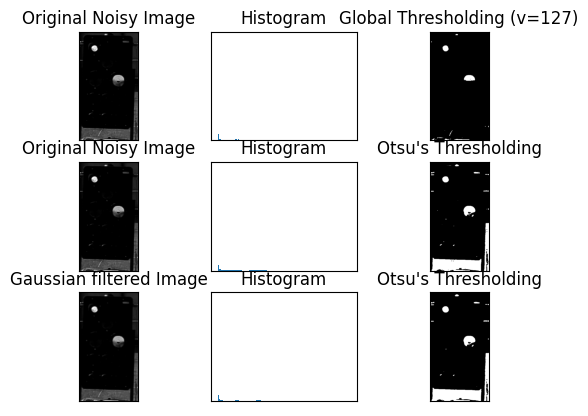

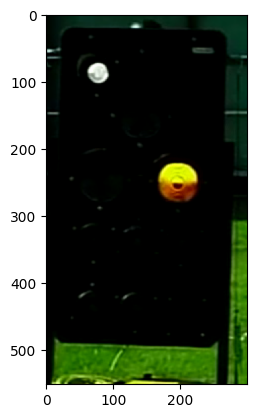

In [10]:
from os import listdir

for filename in listdir("../data/crop_improve"):
    p = "../data/crop_improve/" + filename
    print(filename)
    org = cv2.imread(p)
    image = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
    resized = imutils.resize(image, width=300)     


    
    
    
    #historygramm per color 
    #color = ('b', 'g', 'r')
    #for i, col in enumerate(color):
    #    histr = cv2.calcHist([resized], [i], None, [256], [0, 256])
    #    plt.plot(histr, color=col)
    #    plt.xlim([0, 256])
    #plt.show()

    
    
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  

    dst = cv2.calcHist(gray, [0], None, [256], [0,256])

    plt.hist(gray.ravel(),256,[0,256])
    plt.show()
    
    th(gray)
    th2(gray)

    #hist, bin_edges = np.histogram(resized, bins=60)

    #plt.bar(bin_edges[:-1], hist, width = 1)
    #plt.show()  
    
    plt.imshow(resized)
    plt.show()
    
    #splitted = color_stat(resized)
    #plt.imshow(splitted)
    #plt.show()
    
    #contrast(resized)
    
    #bin , img = handle_image(resized)
    #plt.imshow(bin)
    #plt.show()
    #plt.imshow(img)
    #plt.show()